In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from backend import osaka_backend, transpiler_real_backend, sampler_real_backend, service
from utils import save_obj

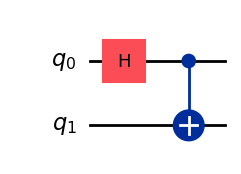

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-bell-state.png")

In [4]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 3
transpiled qc depth: 10


In [5]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctj3n6c4gjh0008ntypg


In [6]:
job_data = {"id":job.job_id()}
save_obj(job_data, "bell-state-job.json")

Saving object as JSON...


In [2]:
job = service.job("ctj3n6c4gjh0008ntypg")

In [3]:
results = job.result()[0].data.meas.get_counts()
results

{'00': 510, '11': 472, '01': 5, '10': 13}

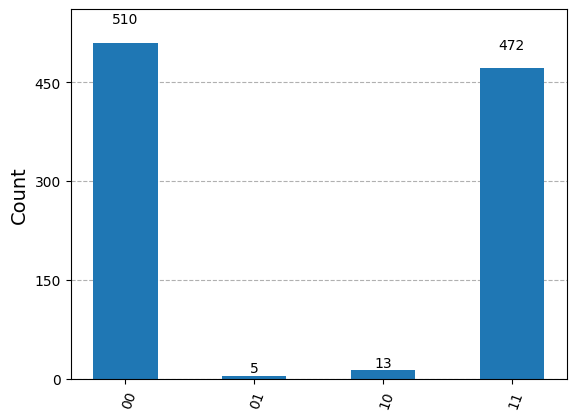

In [4]:
fig = plot_histogram(results)
fig.savefig("bell-state-counts.png", bbox_inches='tight')
display(fig)

---

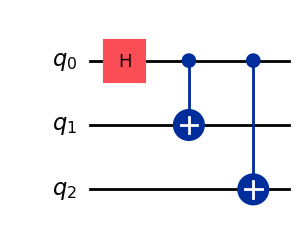

In [6]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-ghz-state.png")

In [7]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 4
transpiled qc depth: 12


In [8]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctjdktf4gjh0008nwdeg


In [9]:
job_data = {"id":job.job_id()}
save_obj(job_data, "ghz-state-osaka-test-job.json")

Saving object as JSON...


In [3]:
job = service.job("ctjdktf4gjh0008nwdeg")

In [4]:
results = job.result()[0].data.meas.get_counts()
results

{'000': 485,
 '111': 465,
 '101': 19,
 '011': 7,
 '010': 14,
 '110': 4,
 '100': 5,
 '001': 1}

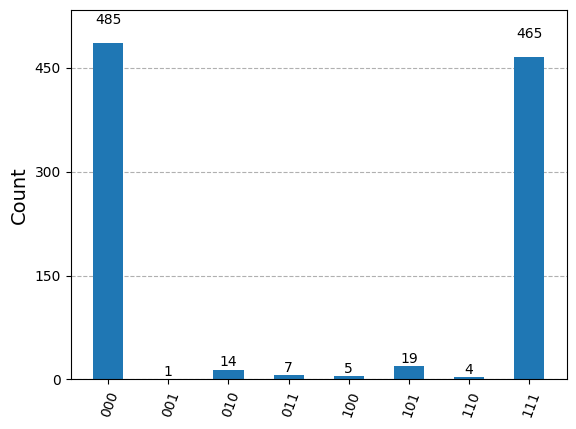

In [5]:
fig = plot_histogram(results)
fig.savefig("small-ghz-counts.png", bbox_inches='tight')
display(fig)

---

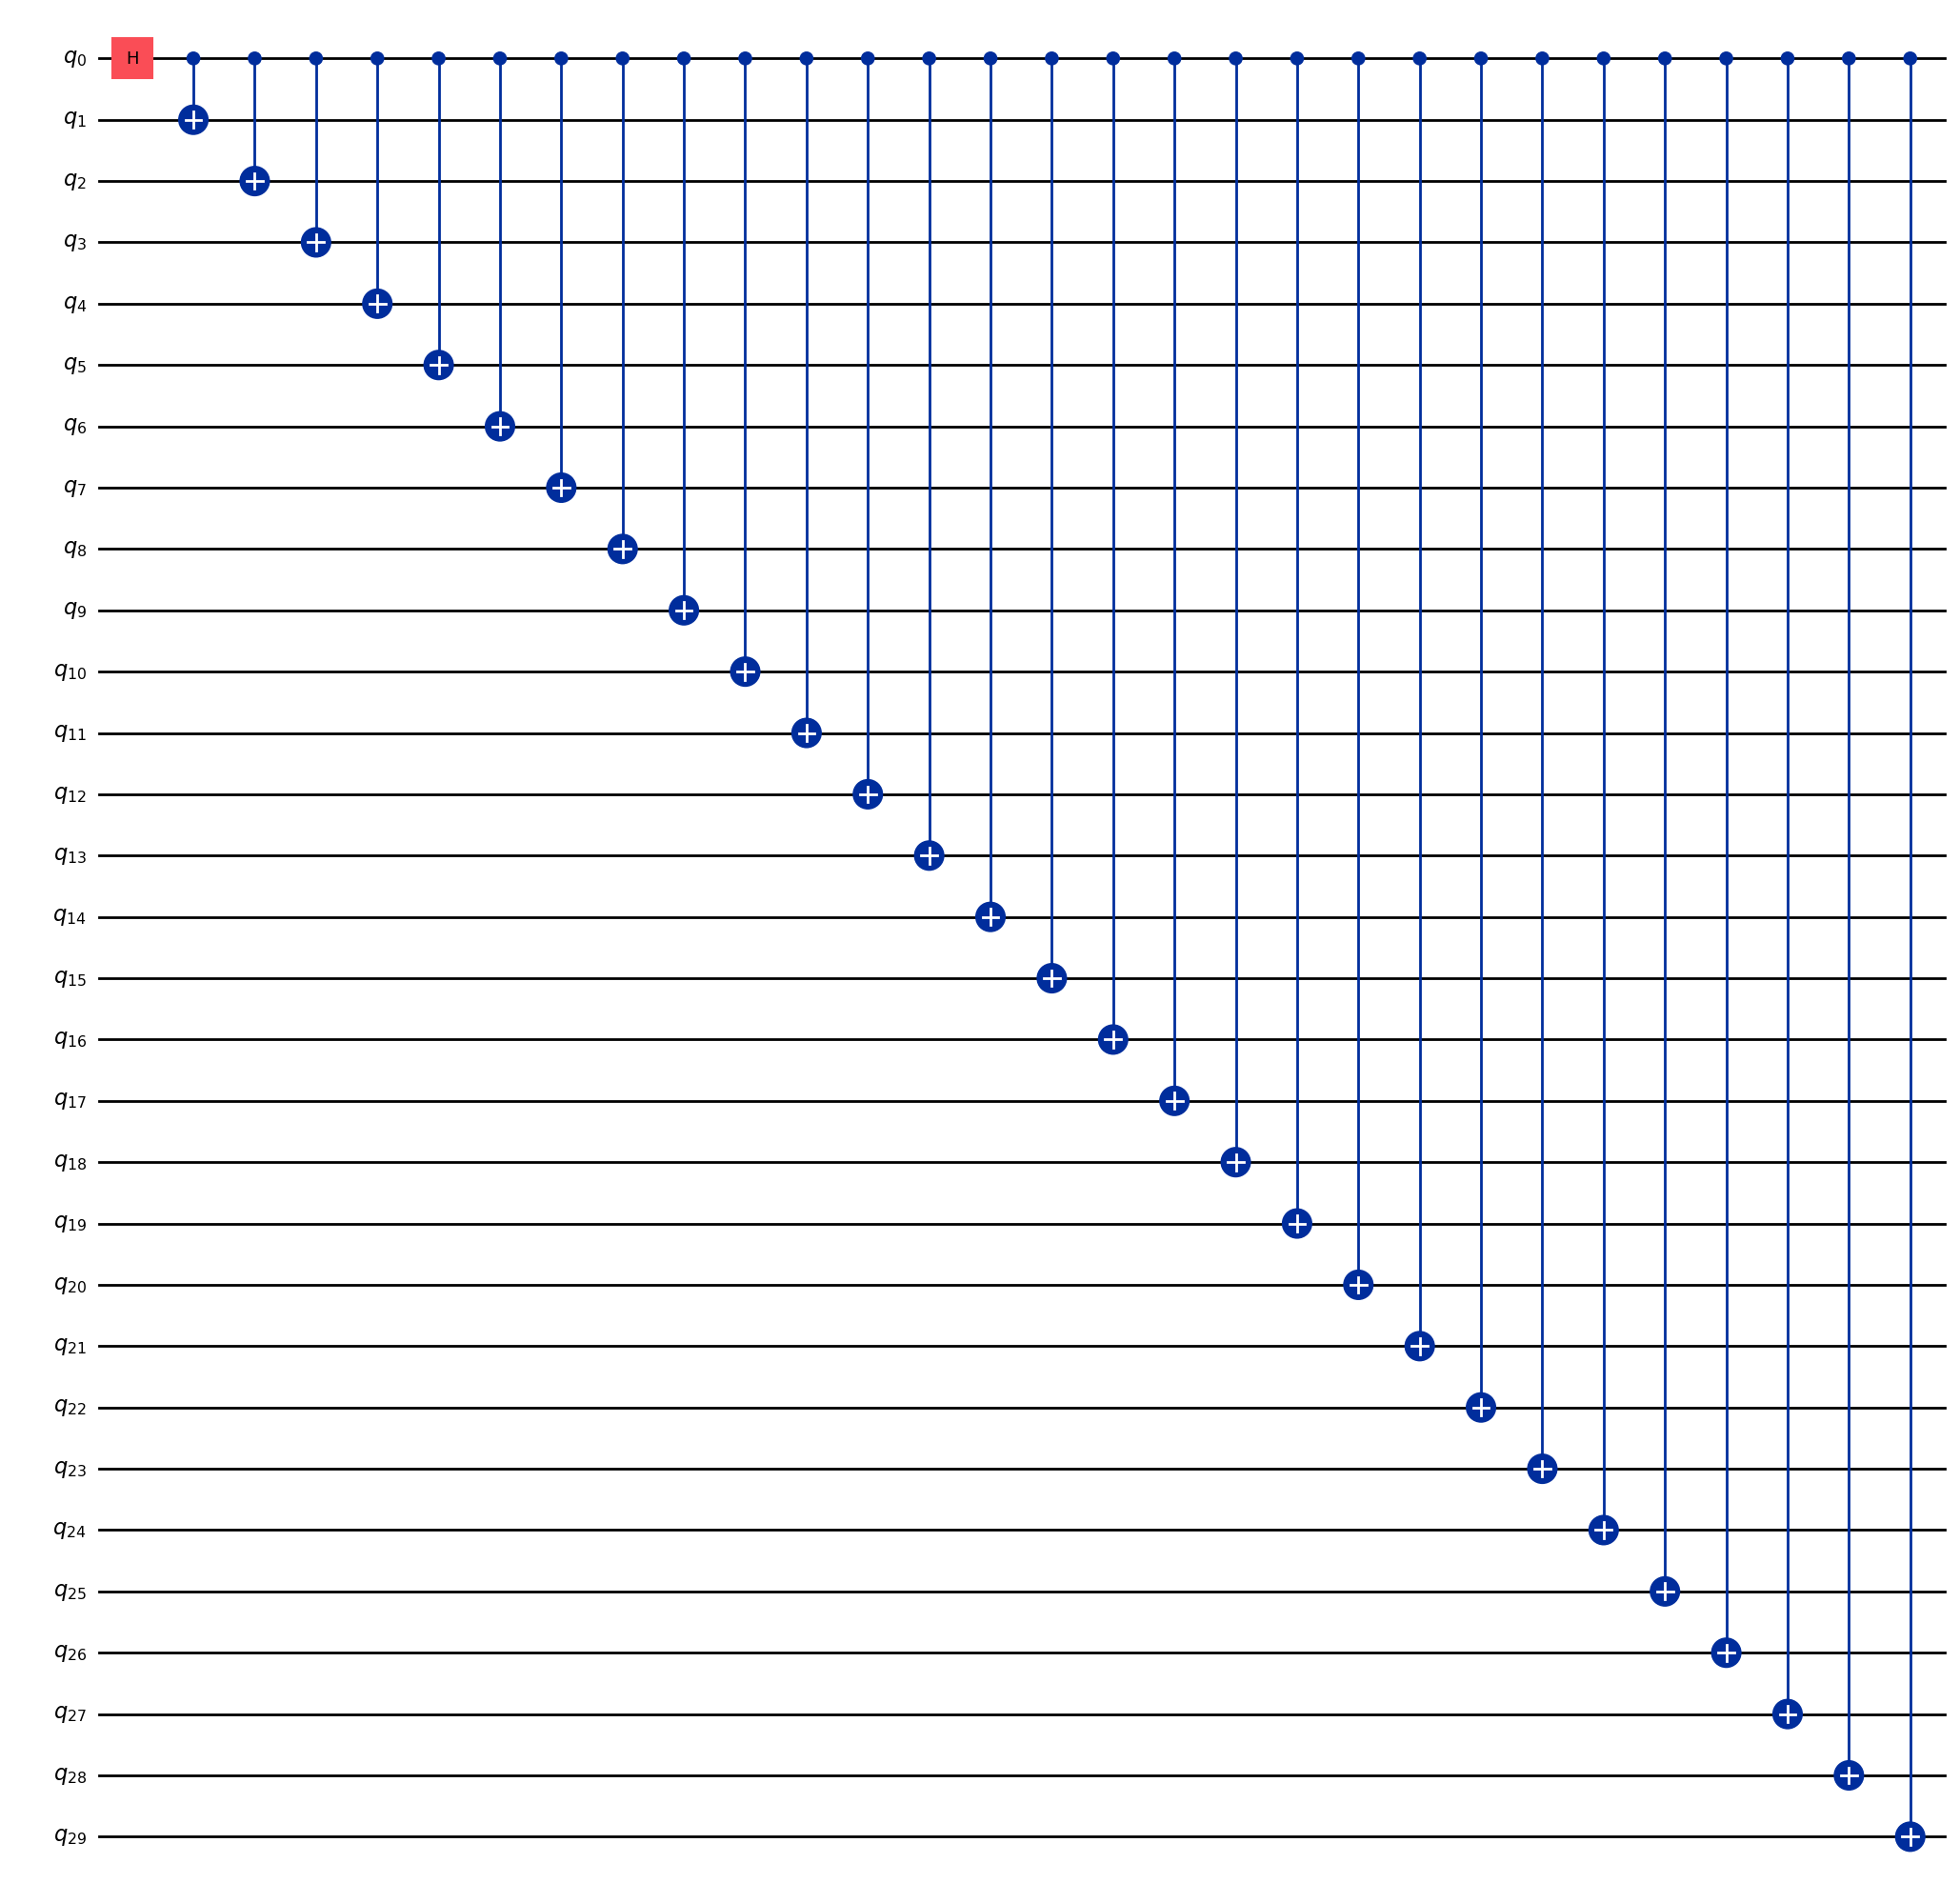

In [6]:
qc = QuantumCircuit(30)
qc.h(0)
for i in range(1,30):
    qc.cx(0, i)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-ghz-state-bigger.png")

In [7]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 31
transpiled qc depth: 364


In [8]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctjgbrzx7b5g008zy7ng


In [9]:
job_data = {"id":job.job_id()}
save_obj(job_data, "bigger-ghz-state-osaka-test-job.json")

Saving object as JSON...


In [ ]:
job = service.job("ctjgbrzx7b5g008zy7ng")

In [ ]:
results = job.result()[0].data.meas.get_counts()
results

In [ ]:
fig = plot_histogram(results)
fig.savefig("bigger-ghz-counts.png", bbox_inches='tight')
display(fig)